<a href="https://colab.research.google.com/github/AnanyaSingh656/Ardra-Summer-Assignment/blob/main/Ananya_Ardra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q1. Dataset: Diabetes Dataset (Scikit-learn)

STEP 1:Load the Dataset from Scikit-learn

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.24.4
!pip install --upgrade --force-reinstall scikit-learn


Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatib

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uni

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

#load dataset
diabetes= load_diabetes()

df=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

df["target"]= diabetes.target

STEP 2: Rename columns

In [ ]:
df.rename(columns={
    's1': 'tc',       # total cholesterol
    's2': 'ldl',      # low-density lipoproteins
    's3': 'hdl',      # high-density lipoproteins
    's4': 'tch',      # total cholesterol / HDL
    's5': 'ltg',      # log of serum triglycerides level
    's6': 'glu'       # blood sugar level
}, inplace=True)

STEP 3: Check for missing values and data types

In [ ]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
age       0
sex       0
bmi       0
bp        0
tc        0
ldl       0
hdl       0
tch       0
ltg       0
glu       0
target    0
dtype: int64


STEP 4: Add bmi-category column

In [ ]:
def bmi_category(bmi):
    if bmi < 0.0:
        return 'Underweight'
    elif bmi < 0.5:
        return 'Normal'
    else:
        return 'Overweight'

df['bmi_category'] = df['bmi'].apply(bmi_category)

STEP 5: Explore relationships

In [ ]:
# Correlation matrix (only numeric columns)
print(df.select_dtypes(include='number').corr())

# Average target per bmi_category
print(df.groupby('bmi_category')['target'].mean())


             age       sex       bmi  ...       ltg       glu    target
age     1.000000  0.173737  0.185085  ...  0.270774  0.301731  0.187889
sex     0.173737  1.000000  0.088161  ...  0.149916  0.208133  0.043062
bmi     0.185085  0.088161  1.000000  ...  0.446157  0.388680  0.586450
bp      0.335428  0.241010  0.395411  ...  0.393480  0.390430  0.441482
tc      0.260061  0.035277  0.249777  ...  0.515503  0.325717  0.212022
ldl     0.219243  0.142637  0.261170  ...  0.318357  0.290600  0.174054
hdl    -0.075181 -0.379090 -0.366811  ... -0.398577 -0.273697 -0.394789
tch     0.203841  0.332115  0.413807  ...  0.617859  0.417212  0.430453
ltg     0.270774  0.149916  0.446157  ...  1.000000  0.464669  0.565883
glu     0.301731  0.208133  0.388680  ...  0.464669  1.000000  0.382483
target  0.187889  0.043062  0.586450  ...  0.565883  0.382483  1.000000

[11 rows x 11 columns]
bmi_category
Normal         196.246154
Underweight    117.307692
Name: target, dtype: float64


STEP 6: Vizualizations (using seaborn and matplotlib)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

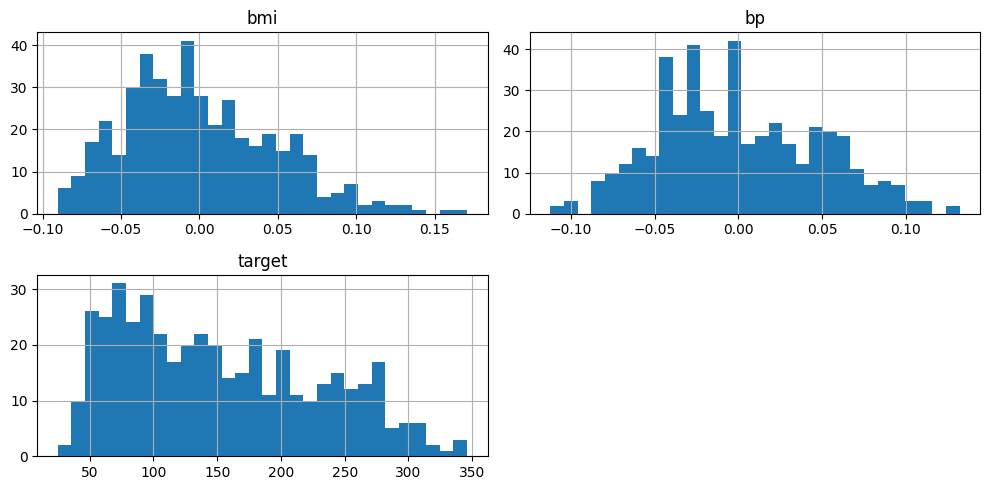

In [ ]:
#for histogram
df[['bmi', 'bp', 'target']].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()

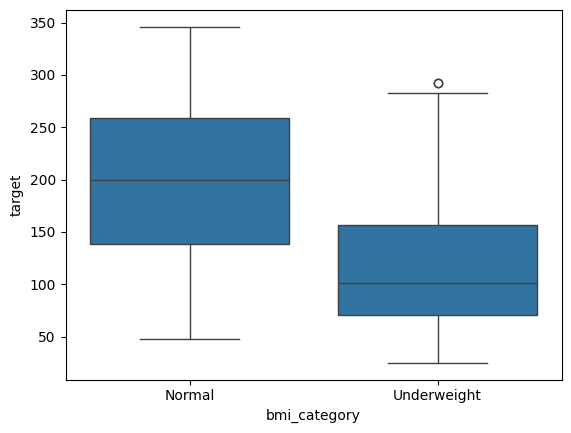

In [ ]:
#for box plot
sns.boxplot(x='bmi_category', y='target', data=df)
plt.show()

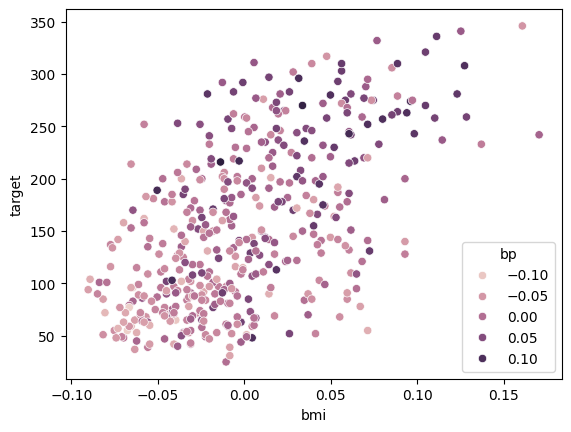

In [ ]:
#for scatter plot
sns.scatterplot(x='bmi', y='target', hue='bp', data=df)
plt.show()

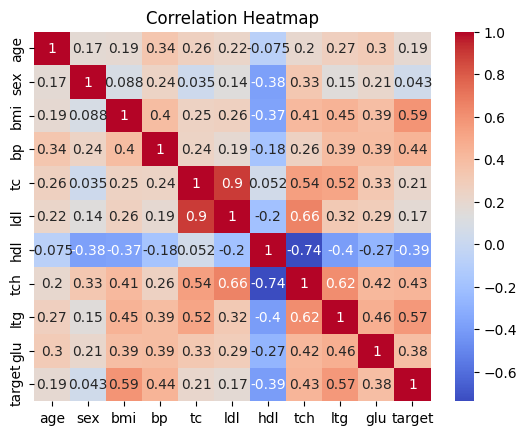

In [ ]:
#for heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Create heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-14-6f00ff6c01fd>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin')['target'].mean().plot(kind='line')


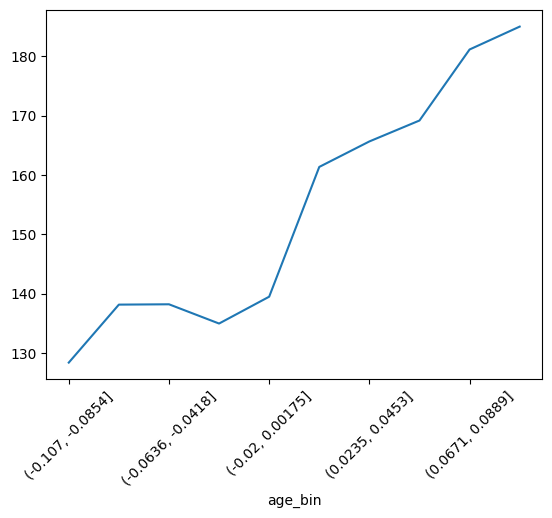

In [ ]:
#for line plot
df['age_bin'] = pd.cut(df['age'], bins=10)
df.groupby('age_bin')['target'].mean().plot(kind='line')
plt.xticks(rotation=45)
plt.show()

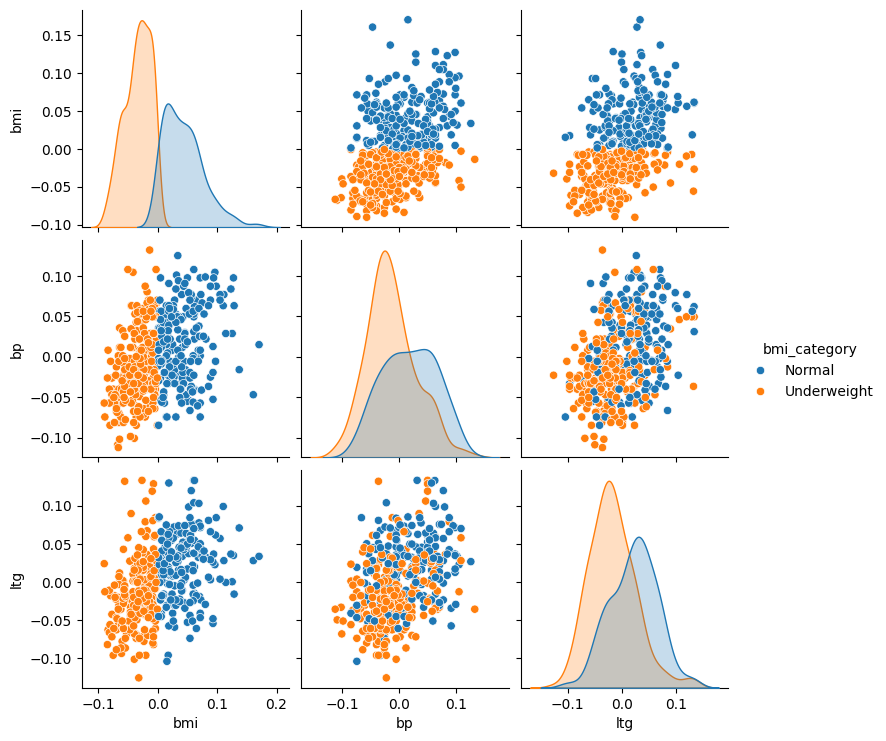

In [ ]:
#for pair plot
sns.pairplot(df, vars=['bmi', 'bp', 'ltg'], hue='bmi_category')
plt.show()